In [1]:
from glob import glob
import statistics
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Make getorf candidates for each protein based on reference protein length distribution

In [2]:
filenames = glob('data/refs_tobamo/*')

In [11]:
ref_stats = {}
proteins = []

for file in filenames:
    name = file.split('/')[-1].split('.')[0]
    with open(file, 'r') as fin:
        fasta_lens = sorted([len(r.seq) for r in SeqIO.parse(fin, 'fasta')])
        minlen = min(fasta_lens)
        maxlen = max(fasta_lens)
        med = round(statistics.median(fasta_lens), 2)
        mean = round(statistics.mean(fasta_lens), 2)
        sd = round(statistics.stdev(fasta_lens),2)
    proteins.append(name)
    
    ref_stats[name] = {'min':minlen, 'max':maxlen, 'median': med, 'mean': mean, 'stdev':sd, 'lens':fasta_lens}
    

In [13]:
ref_stats_df = pd.DataFrame(ref_stats).T
# remove outlyer Gorica orf1 len 773
ref_stats_df.loc['rdrp_orf1', 'lens'] = ref_stats_df.loc['rdrp_orf1', 'lens'][1:]
ref_stats_df

,min,max,median,mean,stdev,lens
cp,124,208,159,160.74,10.39,"[124, 134, 157, 157, 157, 157, 157, 157, 157, ..."
rdrp_orf2,311,501,471.0,463.94,38.64,"[311, 312, 393, 403, 417, 434, 435, 444, 445, ..."
mp,216,334,267.0,272.81,21.01,"[216, 219, 254, 256, 256, 256, 256, 257, 258, ..."
rdrp_orf1,773,1166,1116,1115.04,52.81,"[1081, 1097, 1100, 1100, 1103, 1103, 1103, 110..."


In [19]:
getorf = pd.read_csv('data/getorf_stats.csv')
getorf

,SRR,contig,orf_name,seq,seq_len
0,DRR146894,NODE_4230_length_1601_cov_1210.913325_DRR146894,NODE_4230_length_1601_cov_1210.913325_DRR146894_1,VLTKENLTKWAAGQEPNKLKRINLQDLELSLEKMVEYSMMIKKEPK...,373
1,DRR146894,NODE_4230_length_1601_cov_1210.913325_DRR146894,NODE_4230_length_1601_cov_1210.913325_DRR146894_2,DWSFSFQHLKVLMPYLKYQENFDAIIAEHDLWYDVASLLGSINSIR...,159
2,DRR146894,NODE_7350_length_1000_cov_719.098413_DRR146894,NODE_7350_length_1000_cov_719.098413_DRR146894_1,HTLKKKKKELIRKGFSNTNTIHESQGTTYKKVALVRLNPKSVPIFN...,322
3,DRR146894,NODE_5453_length_1330_cov_737.490980_DRR146894,NODE_5453_length_1330_cov_737.490980_DRR146894_1,HKSVTIDGKRYSKQKFGILSFWNTNISTSHHNTIIERSHITKDIIY...,134
4,DRR146894,NODE_5453_length_1330_cov_737.490980_DRR146894,NODE_5453_length_1330_cov_737.490980_DRR146894_2,FFIFILFFIMASNEPLASGTLNKEPVVRIEQEYGIKRSYKLQIGLN...,443
...,...,...,...,...,...
5396,SRR9665731,NODE_2_length_3626_cov_0.985424_SRR9665731,NODE_2_length_3626_cov_0.985424_SRR9665731_6,GLVIIRANVINNGMDEISIDKHPRDFHIPRKESRKFKLGYQHLTLR...,120
5397,SRR9665731,NODE_164_length_702_cov_1.326957_SRR9665731,NODE_164_length_702_cov_1.326957_SRR9665731_1,LKLRAMNPSCLSSCCVVLILQNTFMSHCWALWFLVYGTYRNPVGVV...,99
5398,SRR9665731,NODE_164_length_702_cov_1.326957_SRR9665731,NODE_164_length_702_cov_1.326957_SRR9665731_2,LKYLSITDFSVVKAQSYESLVPVKLLRGVDLTKHLYVTLLGVVVSG...,234
5399,SRR9960038,NODE_10536_length_2129_cov_1.942008_SRR9960038,NODE_10536_length_2129_cov_1.942008_SRR9960038_1,KITTVCPPSLARGLFAKEIDFSKYDKSQGELHLRIEMRIFELLGLP...,263


In [23]:
x = getorf[getorf['SRR'] == 'SRR6846476']
x.contig.nunique()

1649

In [24]:
getorf.groupby('contig').size().sort_values(ascending=False).head()

contig
k141_356774_flag=1_multi=17.0000_len=5797_SRR6846476    27
NODE_141_length_6984_cov_4.376140_SRR5186291            17
NODE_836_length_7143_cov_21.835073_SRR3624128           17
k141_903112_flag=0_multi=26.8643_len=4650_SRR6846476    16
k141_602825_flag=1_multi=23.0000_len=6559_SRR6846476    16
dtype: int64

In [15]:
# SRR6846476 - 3198 ORFs (suspicious)
getorf.groupby('SRR').size().sort_values(ascending=False).head()

SRR
SRR6846476    3198
SRR1781945      99
SRR8554352      85
SRR1782579      82
SRR4242136      76
dtype: int64

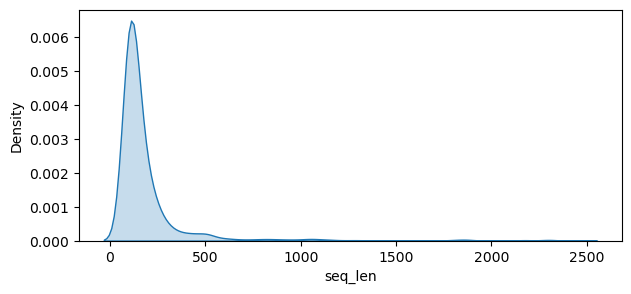

In [13]:
fig, ax = plt.subplots(figsize=(7,3))
fig = sns.kdeplot(getorf.seq_len, fill=True)

In [43]:
# help(GMM)

In [53]:
getorf_270_1120 = getorf[(270 < getorf.seq_len) & (getorf.seq_len < 1120)]

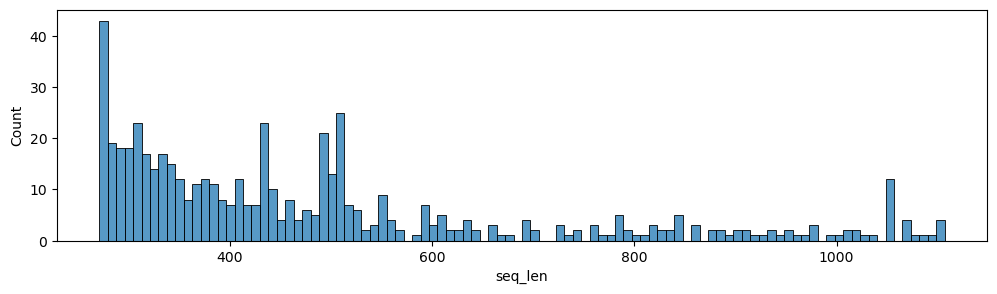

In [56]:
fig, ax = plt.subplots(figsize=(12,3))

sns.histplot(data=getorf_270_1120, x='seq_len', bins=100)
# plt.xlim(150,1500)
# plt.ylim(0,100)
plt.show()

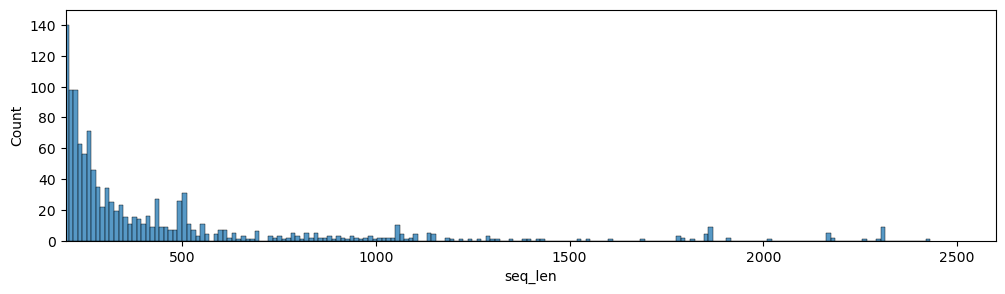

In [70]:
fig, ax = plt.subplots(figsize=(12,3))

sns.histplot(data=getorf, x='seq_len', bins=200)
plt.xlim(200,2600)
plt.ylim(0,150)
plt.show()

In [21]:
ref_stats_df

,min,max,median,mean,stdev,lens
cp,124,208,159,160.74,10.39,"[124, 134, 157, 157, 157, 157, 157, 157, 157, ..."
rdrp_orf2,311,501,471.0,463.94,38.64,"[311, 312, 393, 403, 417, 434, 435, 444, 445, ..."
mp,216,334,267.0,272.81,21.01,"[216, 219, 254, 256, 256, 256, 256, 257, 258, ..."
rdrp_orf1,773,1166,1116,1115.04,52.81,"[773, 1081, 1097, 1100, 1100, 1103, 1103, 1103..."


In [ ]:
113.61 218.39
272.36 539.64
194.99 355.01
720.19 1218.81

In [32]:
# Regular expression pattern to extract length or len
pattern = r'(?:length|len)_(\d+)'

# Function to extract length
def extract_length(text):
    match = re.search(pattern, text)
    if match:
        return int(match.group(1))
    else:
        return None

# Create new column 'Length' by applying the function to the 'ID' column
getorf['contig_length'] = getorf['contig'].apply(extract_length)

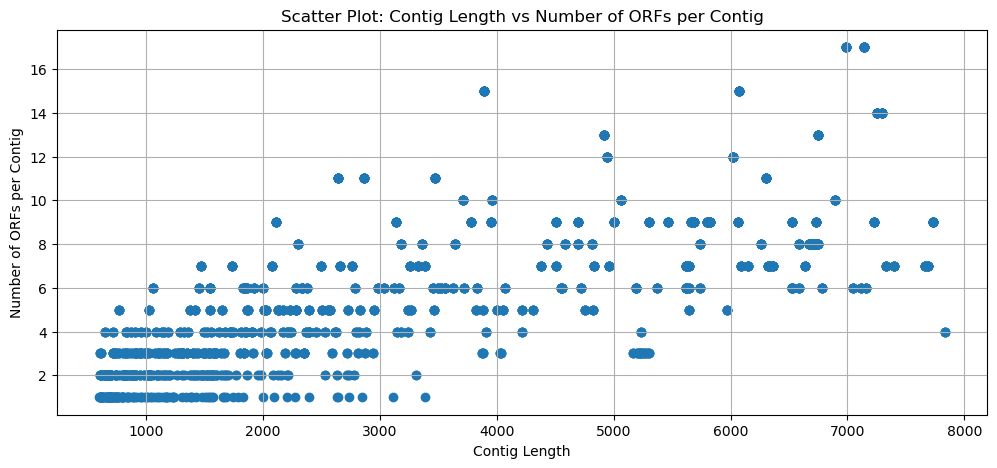

In [35]:
df = getorf
orf_counts = df.groupby('contig').size()

fig, ax = plt.subplots(figsize=(12,5))
plt.scatter(df['contig_length'], df['contig'].map(orf_counts))
plt.xlabel('Contig Length')
plt.ylabel('Number of ORFs per Contig')
plt.title('Scatter Plot: Contig Length vs Number of ORFs per Contig')
plt.grid(True)
plt.show()

#### Filter getorf fasta based on orf len

In [71]:
getorf_path = 'data/getorf_output.fasta'

for protein in proteins:
    fasta_out = f"results/getorf_candidates/getorf_{protein}_candidates.fasta"
    min_lim = ref_stats_df['min'].loc[f'{protein}'] - ref_stats_df['stdev'].loc[f'{protein}'] 
    max_lim = ref_stats_df['max'].loc[f'{protein}'] + ref_stats_df['stdev'].loc[f'{protein}']
    
    print(min_lim,max_lim)
    # # make new filtered fasta
    # with open(getorf_path, "r") as file, open(fasta_out, "w") as outfile:
    #     out_seq = (r for r in SeqIO.parse(file, "fasta") if min_lim < len(r.seq) < max_lim)
    #     SeqIO.write(out_seq, outfile, "fasta")

113.61 218.39
272.36 539.64
194.99 355.01
720.19 1218.81
